# 안녕하세요, 여러분 ^^ 

# 디지코 디그리 AI 모델링 과정 
# 🎈"도전 머신러닝" 시간에 오신 여러분을 환영합니다!

## 오늘은 <font color="#01918a">'타이타닉 생존자 예측'</font> 문제를 해결해 보겠습니다.

<img src = "https://images.unsplash.com/photo-1654170816607-f355d5cd5619?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2664&q=80" width=100% align="center"/>

<div align="right">사진: <a href="https://unsplash.com/ko/%EC%82%AC%EC%A7%84/TQAWPDbuwrc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>의<a href="https://unsplash.com/@ep_petrus?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Edwin Petrus</a></div>

---

## 1. 데이터 수집 및 분석
### 1) 데이터 불러오기

In [1]:
# pip 이용해서 필요 라이브러리 설치(앞선 실습에서 미 설치 시 실행)

# 사내 컴퓨터 사용 시
#!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U graphviz

import os
os.environ["PATH"] += os.pathsep + os.path.abspath("./bin")

# 사외 컴퓨터 사용 시
#!pip install pandas-profiling seaborn graphviz

In [2]:
# 기본 라이브러리 불러오기
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 데이터 불러오기
df = pd.read_csv("./data/train_preprocessing_2.csv")

In [4]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,0.2750,0.125,0.0,0.014151,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1,0.4750,0.125,0.0,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.3250,0.000,0.0,0.015469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0.4375,0.125,0.0,0.103644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.4375,0.000,0.0,0.015713,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   SibSp         891 non-null    float64
 3   Parch         891 non-null    float64
 4   Fare          891 non-null    float64
 5   Title_Mr      891 non-null    float64
 6   Title_Mrs     891 non-null    float64
 7   Title_Others  891 non-null    float64
 8   Pclass_2      891 non-null    float64
 9   Pclass_3      891 non-null    float64
 10  Sex_male      891 non-null    float64
 11  Embarked_Q    891 non-null    float64
 12  Embarked_S    891 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 90.6 KB


---

## 2. 데이터 전처리 (1)
불필요한 컬럼을 삭제하거나 기존 데이터로 부터 새로운 컬럼을 생성합니다.
데이터의 결측치를 확인하고 처리합니다
- 데이터 가공하기
- 결측치 제거하기
- 불필요한 컬럼 삭제하기

---

## 3. 데이터 전처리 (2)
범주형 변수를 수치형 데이터로 변환하고, 다양한 특성들의 스케일을 조정하여 데이터를 모델링에 적합한 형태로 전처리하는 과정입니다.

- 범주형 데이터 인코딩
- 특성 스케일링/정규화

---

## 4. 머신러닝 모델링
데이터를 수집하고 전처리하여 특성을 선택하고 엔지니어링한 후, 
학습 데이터와 검증용 데이터를 분리하고 적절한 머신러닝 모델을 선택하여 학습시킨 다음,
모델의 성능을 평가하고 성능을 향상시키는 작업을 수행하는 단계입니다.

- Train(학습용), Test(검증용) 데이터 셋 분할
- 머신러닝 모델 구현하기
- 머신러닝 모델 저장하기

### 1) Train(학습용), Test(검증용) 데이터 셋 분할

#### ① Feature / Target 데이터 분리하기

- **Feature는 X, Target은 y로 분리**

In [6]:
# Feature는 Target('Survived') 제외한 나머지 
x = df.drop(columns=['Survived'])

# Target은 'Survived'
y = df['Survived']

In [7]:
x.shape, y.shape

((891, 12), (891,))

#### ② Train(학습용) / Test(검증용) 데이터 셋 나누기
<img src="https://i.stack.imgur.com/pXAfX.png" width=600> 

<div align="right">Image by <a href="https://datascience.stackexchange.com/questions/61467/clarification-on-train-test-and-val-and-how-to-use-implement-it">"clarification on train, test and val and how to use"</a> on <a href="https://datascience.stackexchange.com/" >datascience.stackexchange</a></div>

- **x, y 값을 가지고 8:2 비율로 Train, Test 을 나누세요.**

In [13]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 데이터 Set 나누기 (Train:Test = 8:2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

---

### 2. 머신러닝 모델 구현하기

#### ① 선형 모델
- **로지스틱 회귀(Logistic Regression)**

로지스틱 회귀 모델은 이진 분류에 사용되는 알고리즘으로, 선형 회귀를 확장하여 로지스틱 함수를 이용하여 입력 변수와 가중치의 조합을 확률로 변환하여 예측하는 모델입니다

__[라이브러리 임포트]__

In [14]:
# 라이브러리 임포트
from sklearn.linear_model import LogisticRegression

__[모델 학습하기]__

In [15]:
# 모델 학습하기
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

__[모델 예측하기]__

In [16]:
# 예측하기
lr_pred = lr_model.predict(x_test)

__[모델 성능 평가하기]__<br>
분류 모델의 성능 평가는 모델의 분류 결과가 얼마나 정확한지를 평가하는 과정입니다. 주요 성능 평가 지표로는 다음과 같은 지표들이 사용됩니다:

> - 정확도(Accuracy): 전체 샘플 중 모델이 정확하게 분류한 샘플의 비율로, 일반적으로 많이 사용되는 평가 지표입니다.
> - 정밀도(Precision): 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율로, FP(False Positive)를 줄이는 데 초점을 둡니다.
> - 재현율(Recall 또는 Sensitivity): 실제로 양성인 샘플 중 모델이 양성으로 예측한 샘플의 비율로, FN(False Negative)을 줄이는 데 초점을 둡니다.
> - F1 스코어(F1 Score): 정밀도와 재현율의 조화 평균으로, 정확한 양성 예측을 위해 두 지표를 균형있게 고려합니다.

회귀 모델의 성능 평가
> - MAE(Mean Absolute Error): 평균 절대 오차. 예측값에 대한 실제값의 오차(Error)를 구하고, 그 절댓값(Absolute)의 평균(Mean)을 구하는 것으로 모델의 성능을 쳥가하는 지표. 오차가 작을수록 모델의 성능이 좋으므로 MAE의 값이 작은 모델을 찾아야함
> - MSE(Mean Squared Error): 평균 제곱 오차. 예측값에 대한 실제값의 오차를 구하는 것은 MAE와 동일하지만 절댓값이 아닌 제곱(squared)을 취하고 그 값의 평균(mean)을 구하는 것으로 모델의 성능을 평가하는 것
> - RMSE(Root Mean Squared Error): 평균 제곱근 오차. MSE에 루트를 취한 지표. 보통 MSE는 데이터가 많고 오차가 발생할소록 그 값이 기하급수적으로 커지기 때문에 지표로 활용하기 어려운 경우가 발생하여 그 값을 줄이기 위해 루트를 취한 것. MAE와 함께 가장 일반적으로 쓰이는 평가지표
> - R2 Score: 결정계수, r제곱 통계 등의 이름으로 불림. 회귀 모델이 데이터에 얼마나 적합한지를 나타내는 것.

In [17]:
# 라이브러리 불러오기
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, lr_pred)) 
print("F1 Score : ", f1_score(lr_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

F1 Score :  0.7297297297297297


#### ② 트리 모델
- **의사결정나무(DecisionTree)**

주어진 입력값들의 조합에 대한 의사결정규칙(rule)에 따라 출력값을 예측하는 모형으로 트리구조의 그래프로 표현할 수 있습니다. 의사결정나무모형의 예측력은 다른 지도학습 기법들에 비해 대체로 떨어지나 해석이 수월하다는 장점이 있습니다.
깊어 질 수록 계속 내려가서 학습 데이터에 너무 과적합 됨. 트리의 깊이를 조절하여 성능을 개선.

데이터가 단순하면 성능이 좋음. 데이터가 복잡하면 성능이 떨어짐

In [18]:
# 라이브러리 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 불러오기
dt_model = DecisionTreeClassifier()

# 모델 학습하기
dt_model.fit(x_train, y_train)

# 예측하기
dt_pred = dt_model.predict(x_test)

# 성능 평가하기
print(classification_report( y_test, dt_pred)) 
print("F1 Score : ", f1_score(y_test, dt_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

F1 Score :  0.7567567567567568


- **Decision Tree 구조 확인하기**

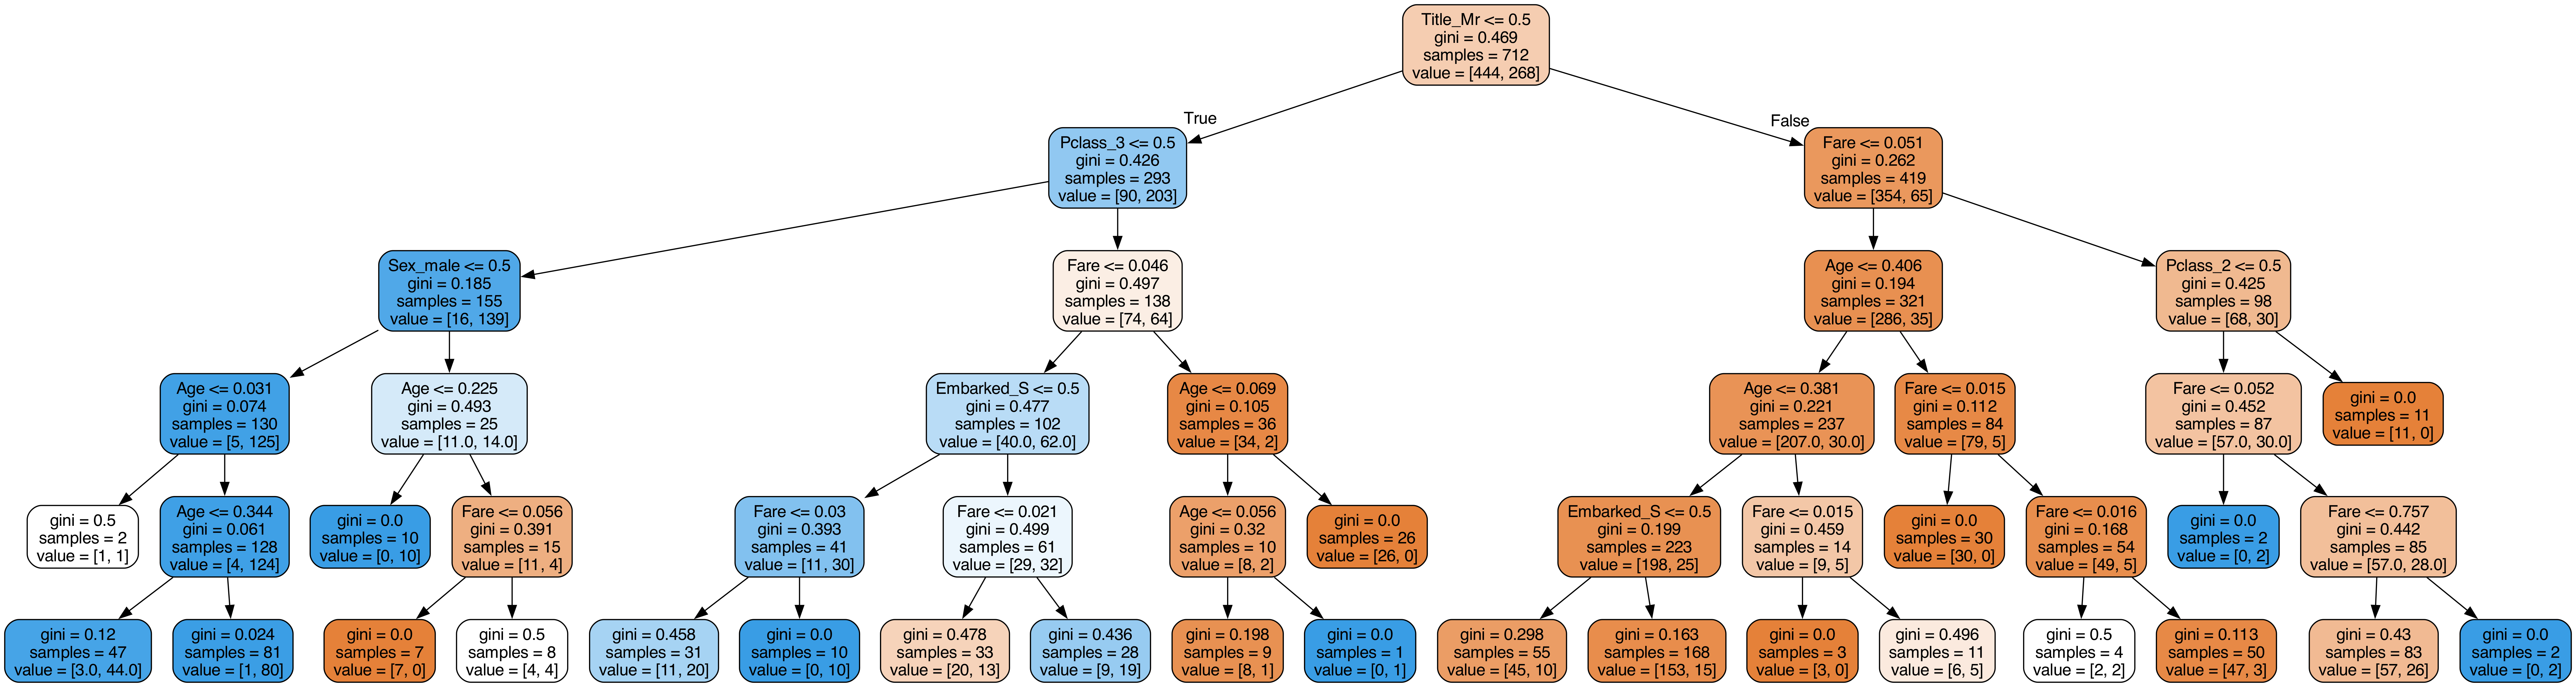

In [28]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz

# 이미지 파일 만들기
export_graphviz(dt_model,                        # 모델이름
                out_file='tree.dot',
                feature_names=x.columns,      # Feature 이름
                rounded=True,
                filled = True)
# mac 에서 "brew install graphviz"를 이용해 라이브러리 설치가 필요하다
!dot -Tpng tree.dot -o tree.png -Gdpi=300

# 이미지 파일 로딩
from IPython.display import Image
Image(filename='tree.png', width=600)        # 사이즈 조정

#### ③ 모델 최적화 (성능 개선)
머신러닝 모델의 성능을 최대화하기 위해 모델의 구조, 매개변수 또는 하이퍼파라미터를 조정하는 과정입니다. 모델 최적화는 주어진 데이터에 가장 적합한 모델을 찾는 것을 목표로 하며, 모델의 성능, 일반화 능력, 안정성 등을 향상시킵니다.

- **Panda전략 : Babysitting one model**<br>
<img src="https://wikidocs.net/images/page/160518/%ED%8C%AC%EB%8D%94.png" width=200> 
크게 하나의 모델을 정하고 성능을 평가하면서 점진적으로 모델을 '돌보기'하는 전략<br>
한 번에 한마리씩 아기를 가지는 팬더는 아기 팬더가 살아남을 수 있도록 지극정성으로 케어를 하는데, 여기서도 동일하게 하나의 모델을 잘 케어해서 최적화하는 개념을 이야기한다.

1. **Logistic Regression 주요 하이퍼파라미터**
 - C (Inverse of regularization strength
> 규제 강도를 조절하는 하이퍼파라미터입니다. <br>
> C 값이 작을수록 모델의 규제가 강화되어 일반화 능력을 향상시키고, <br>
> C 값이 클수록 규제가 약화되어 훈련 데이터에 더 적합하게 됩니다.

In [25]:
# 모델 불러오기
lr_model = LogisticRegression(C=0.1)

# 모델 학습하기
lr_model.fit(x_train, y_train)

# 예측하기
lr_pred = lr_model.predict(x_test)

# 성능 평가하기
print("F1 Score : ", f1_score(y_test,lr_pred)) 

F1 Score :  0.7432432432432432


2. **DecisionTree Classification 주요 하이퍼파라미터**
 - max_depth (최대 깊이)
 > 의사결정나무의 최대 깊이를 제한하는 하이퍼파라미터<br>
 > 트리의 깊이를 제한하여 모델의 복잡성을 조절하고 과적합을 방지할 수 있습니다.
 - min_samples_split (노드 분할 최소 샘플 수)
 > 노드를 분할하기 위해 필요한 최소한의 샘플 수를 지정<br>
 > 이 값을 높게 설정하면 더 일반화된 모델을 생성할 수 있습니다.
 - min_samples_lead (단말 노드 최소 샘플 수)
 > 단말 노드(leaf node)가 되기 위해 필요한 최소한의 샘플 수를 지정<br> 
 > 이 값을 높게 설정하면 더 일반화된 모델을 생성할 수 있습니다.

In [26]:
# 모델 불러오기
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=4)

# 모델 학습하기
dt_model.fit(x_train, y_train)

# 예측하기
dt_pred = dt_model.predict(x_test)

# 성능 평가하기
print("F1 Score : ", f1_score(y_test, dt_pred)) 

F1 Score :  0.7857142857142857


#### ④ 교차 검증
머신러닝 모델의 성능을 평가하고 일반화(generalization) 능력을 검증하기 위해 사용되는 기법입니다. 모델을 개발할 때 데이터를 훈련 세트와 테스트 세트로 나누어서 모델을 평가하는 것보다 더 신뢰할 수 있는 결과를 얻을 수 있습니다.

- **생성한 모델들을 교차 검증을 통해서 일반화 성능을 비교햐 보세요.**
> - cross_val_score 함수를 사용해 모델을 검증합니다.
> - 학습, 예측, 평가가 한 번에 이루어짐을 기억해야 합니다.
> - cv = 10으로 지정합니다.
> - scoring = f1_macro 으로 지정합니다.

In [27]:
# 라이브러리 불러오기
from sklearn.model_selection import cross_val_score

# 학습, 예측, 평가하기
lr_cv_score = cross_val_score(lr_model, x, y, cv=10, scoring='f1_macro')
dt_cv_score = cross_val_score(dt_model, x, y, cv=10, scoring='f1_macro')

# 확인
print("LogisticRegression 모델")
print("F1 Score : ", lr_cv_score.mean())
    
print("DecisionTreeClassifierㅌ 모델")
print("F1 Score : ", dt_cv_score.mean())

LogisticRegression 모델
F1 Score :  0.7845904560793786
DecisionTreeClassifierㅌ 모델
F1 Score :  0.8067911234729509


---

### <font color="red"> [실습]</font> 
앞선 실습 과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

__<font color=red>[Q]</font> 'Survived'를 y(target)으로 하고 나머지 컬럼을 x(feature)로 만드세요.__
- target 변수:Y, feature 변수:X

In [ ]:
# 여기에 입력하세요.





#### __<font color='red'>[Q]</font> x와 y 값을 가지고 8:2 비율로 Train, Test 데이터 셋을 나누세요.__
- train 데이터 셋 : X_train, Y_train<br>
- test 데이터 셋 : X_test, Y_test<br>

In [ ]:
# 여기에 입력하세요.





#### __<font color='red'>[Q]</font> 원하는 모델을 선택하고 하이퍼파라미터를 조정해서 나만의 모델을 만들어 보세요.__
- 모델 변수명은 'my_model'로 저장하세요.
- 하이퍼파라미터를 조정해서 개선된 성능의 나만의 모델을 만들어 보세요.
- f1_score 성능 지표를 사용하여 모델을 평가해 보세요.

In [ ]:
#여기에 입력하세요.










---

### 3) 모델 저장하기
scikit-learn은 joblib 라이브러리를 활용하여 모델을 저장하고 로드할 수 있는 dump와 load 함수를 제공합니다.<br>

#### ① 학습시킨 모델 저장하기
joblib의 dump 함수를 사용하여 모델을 파일로 저장할 수 있습니다.
> - joblib.dump(model, 'model_file.pkl')<br>
> 첫 번째 인자로 저장할 모델 객체를 전달하고, <br>두 번째 인자로 저장할 파일의 경로와 이름을 지정합니다.

In [30]:
# 라이브러리 임포트
import joblib

#model 저장
joblib.dump(my_model,'./model_사번_이름.pkl')

['./model_사번_이름.pkl']

---